In [1]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt
import community as lv
import scipy.stats as sp
import math

In [2]:
coopokemon = nx.read_gexf('gephi/arceus.gexf')

Potatura dei link:

In [3]:
win_rate, win_matches = 80, 4
for e in list(coopokemon.edges):
    w = coopokemon[e[0]][e[1]]['won']
    r = coopokemon[e[0]][e[1]]['rate']
    if r < win_rate or w < win_matches: #or (m-w) <= math.ceil(math.sqrt(m))-1:
        coopokemon.remove_edge(e[0],e[1])

Cancellamento dei singoletti:

In [4]:
for pokemon in list(coopokemon.nodes()):
    if not len(list(coopokemon.neighbors(pokemon))):
        coopokemon.remove_node(pokemon)

Esportazione su file

In [5]:
nx.write_gexf(coopokemon, 'gephi/arceus-pruned.gexf')

## Grado e Dimensione

In [6]:
coopokemon.order(), coopokemon.size()

(447, 2760)

In [7]:
eff_weight = None
gradi = dict(coopokemon.degree(weight=eff_weight))
lista_gradi = list(gradi.values())

### Hubs

In [8]:
classif = sorted(gradi.items(), reverse=True,key=lambda val: val[1])
classif[:5],'..','..', classif[-5:]

([('Xerneas', 46),
  ('Kommo-o', 43),
  ('Yveltal', 40),
  ('Scyther', 37),
  ('Salamence', 36)],
 '..',
 '..',
 [('Throh', 2),
  ('Magcargo', 1),
  ('Mothim', 1),
  ('Sigilyph', 1),
  ('Wishiwashi', 1)])

#### In percentile

In [9]:
hub_nodi = [k for k,v in gradi.items() if v>= np.percentile(lista_gradi,97)]
hub_nodi

['Scyther',
 'Aerodactyl',
 'Mewtwo',
 'Swampert',
 'Salamence',
 'Groudon',
 'Lucario',
 'Xerneas',
 'Yveltal',
 'Kommo-o',
 'Lunala',
 'Kartana',
 'Necrozma',
 'Marshadow',
 'Zeraora']

#### Indici su grado

In [10]:
print('Media:', np.mean(lista_gradi))
print('Massimo:', np.max(lista_gradi))
print('Minimo:', np.min(lista_gradi))
print('Mediana:', np.median(lista_gradi))
print('Moda:', sp.mode(lista_gradi).mode[0])

Media: 12.348993288590604
Massimo: 46
Minimo: 1
Mediana: 11.0
Moda: 10


## PDF

In [11]:
counts, bins = np.histogram(lista_gradi, bins=np.arange(min(lista_gradi), max(lista_gradi)+1))
pdf = counts #/ len(lista_gradi)

#### Plotting

Text(0, 0.5, 'How many Pokémon')

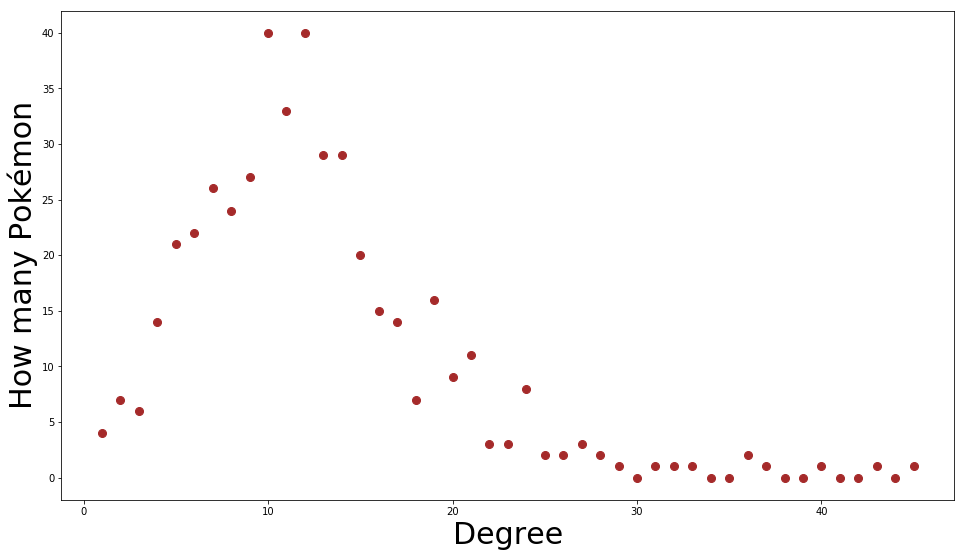

In [12]:
fig = plt.figure(figsize=(16,9))
assi = fig.gca()
assi.plot(bins[:-1], pdf, color='brown',marker='o', linestyle=' ', ms=8)
assi.set_xlabel('Degree',size=30)
assi.set_ylabel('How many Pokémon',size=30)

### Cumulativa

In [13]:
cdf = np.cumsum(pdf)

Text(0, 0.5, 'Quanti Pokemon < OR =')

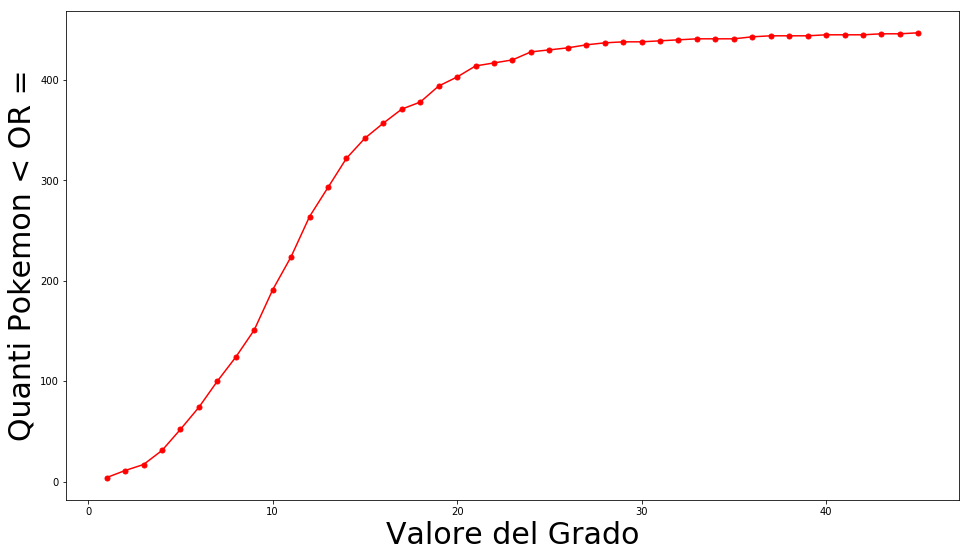

In [14]:
assi = plt.figure(figsize=(16,9)).gca()
assi.plot(bins[:-1], cdf, color = 'red', marker = 'o', linestyle = '-', ms = 5)
assi.set_xlabel('Valore del Grado',size=30)
assi.set_ylabel('Quanti Pokemon < OR =',size=30)

##### ECDF (uguale ma più carina)

Text(0, 0.5, 'CDF')

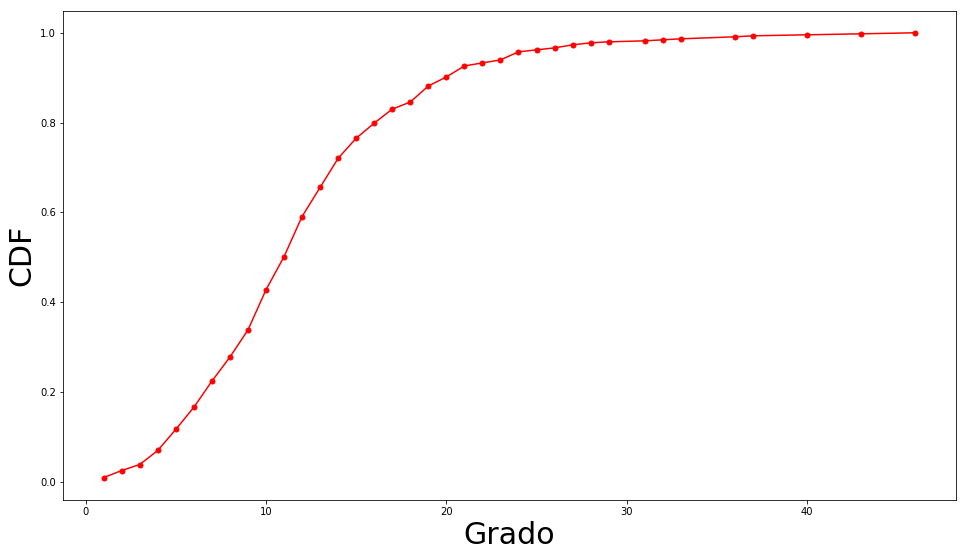

In [15]:
ecd_function = ECDF(lista_gradi)
x = np.unique(lista_gradi)
assi = plt.figure(figsize=(16,9)).gca()
assi.plot(x, ecd_function(x), color = 'red', linestyle = '-', marker= 'o',ms = 5)
assi.set_xlabel('Grado',size = 30)
assi.set_ylabel('CDF',size = 30)

### Misure di centralità

In [16]:
norma = {k:(v/coopokemon.order()-1) for k,v in gradi.items()}
massima = {k:(v/max(lista_gradi)) for k,v in gradi.items()}
somma = {k:(v/sum(lista_gradi)) for k,v in gradi.items()}

##### Normale

In [17]:
classif = sorted(norma.items(), reverse=True,key=lambda val: val[1])
classif[:6],'..','..', classif[-6:]

([('Xerneas', -0.8970917225950783),
  ('Kommo-o', -0.9038031319910514),
  ('Yveltal', -0.9105145413870246),
  ('Scyther', -0.9172259507829977),
  ('Salamence', -0.9194630872483222),
  ('Marshadow', -0.9194630872483222)],
 '..',
 '..',
 [('Cherrim', -0.9955257270693513),
  ('Throh', -0.9955257270693513),
  ('Magcargo', -0.9977628635346756),
  ('Mothim', -0.9977628635346756),
  ('Sigilyph', -0.9977628635346756),
  ('Wishiwashi', -0.9977628635346756)])

##### Massima

In [18]:
classif = sorted(massima.items(), reverse=True,key=lambda val: val[1])
classif[:6],'..','..', classif[-6:]

([('Xerneas', 1.0),
  ('Kommo-o', 0.9347826086956522),
  ('Yveltal', 0.8695652173913043),
  ('Scyther', 0.8043478260869565),
  ('Salamence', 0.782608695652174),
  ('Marshadow', 0.782608695652174)],
 '..',
 '..',
 [('Cherrim', 0.043478260869565216),
  ('Throh', 0.043478260869565216),
  ('Magcargo', 0.021739130434782608),
  ('Mothim', 0.021739130434782608),
  ('Sigilyph', 0.021739130434782608),
  ('Wishiwashi', 0.021739130434782608)])

##### Somma

In [19]:
classif = sorted(somma.items(), reverse=True,key=lambda val: val[1])
classif[:6],'..','..', classif[-6:]

([('Xerneas', 0.008333333333333333),
  ('Kommo-o', 0.0077898550724637685),
  ('Yveltal', 0.007246376811594203),
  ('Scyther', 0.0067028985507246374),
  ('Salamence', 0.006521739130434782),
  ('Marshadow', 0.006521739130434782)],
 '..',
 '..',
 [('Cherrim', 0.00036231884057971015),
  ('Throh', 0.00036231884057971015),
  ('Magcargo', 0.00018115942028985507),
  ('Mothim', 0.00018115942028985507),
  ('Sigilyph', 0.00018115942028985507),
  ('Wishiwashi', 0.00018115942028985507)])

### Closeness:

In [20]:
classif = sorted(nx.closeness_centrality(coopokemon).items(), reverse=True,key=lambda val: val[1])
classif[:6],'..','..', classif[-6:]

([('Xerneas', 0.4724576271186441),
  ('Yveltal', 0.4616977225672878),
  ('Kommo-o', 0.451417004048583),
  ('Kartana', 0.44555444555444557),
  ('Scyther', 0.4433399602385686),
  ('Salamence', 0.43768400392541706)],
 '..',
 '..',
 [('Sunflora', 0.2967398536260812),
  ('Mothim', 0.282994923857868),
  ('Unown', 0.27962382445141065),
  ('Wishiwashi', 0.275990099009901),
  ('Sigilyph', 0.26770708283313327),
  ('Magcargo', 0.26421800947867297)])

### EigenVector

In [21]:
eigen = nx.eigenvector_centrality_numpy(coopokemon, weight=eff_weight) #weight=None
classif = sorted(eigen.items(), reverse=True,key=lambda val: val[1])
classif[:6],'..','..', classif[-6:]

([('Xerneas', 0.16027901996750632),
  ('Yveltal', 0.1593941696902976),
  ('Kommo-o', 0.12866520984200433),
  ('Scyther', 0.12821173757652285),
  ('Kartana', 0.1260960441041595),
  ('Salamence', 0.12188375749509321)],
 '..',
 '..',
 [('Sunflora', 0.0052654620753427635),
  ('Mothim', 0.0037236226642043545),
  ('Unown', 0.0033729254665198203),
  ('Wishiwashi', 0.0032228158013209583),
  ('Magcargo', 0.0018406668717990378),
  ('Sigilyph', 0.0017694252645897382)])

## Distribuzione dei pesi dei link (per la potatura)

Text(0, 0.5, 'Quanti archi')

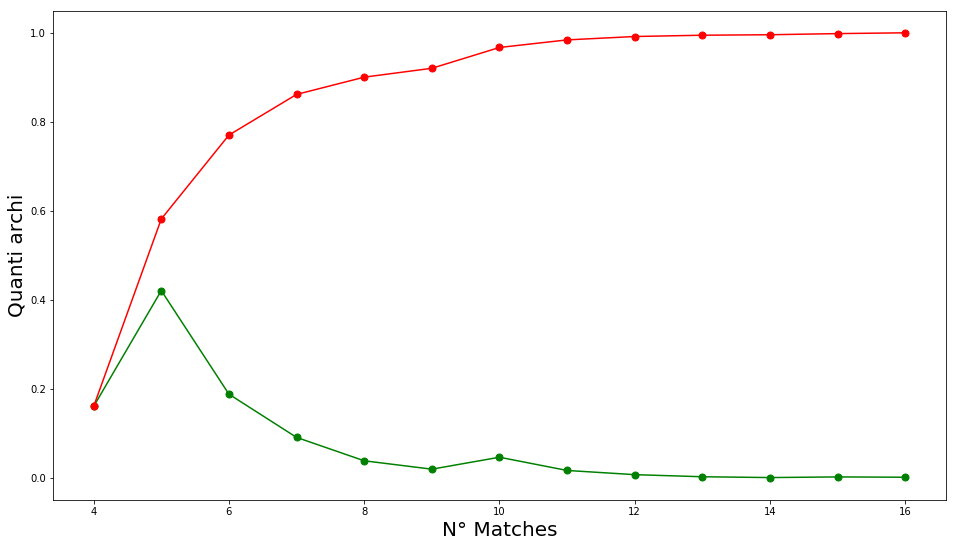

In [22]:
arr = [coopokemon[i[0]][i[1]]['count'] for i in coopokemon.edges()]
counts, x = np.histogram(arr, bins=np.arange(min(arr), max(arr)+1))
y = counts / len(arr)

assi = plt.figure(figsize=(16,9)).gca()
assi.plot(x[:-1], y, color='green',marker='o', linestyle='-', ms=7)
assi.plot(x[:-1], np.cumsum(y), color='red',marker='o', linestyle='-', ms=7)
assi.set_xlabel('N° Matches',size=20)
assi.set_ylabel('Quanti archi',size=20)

Text(0, 0.5, 'Quanti archi')

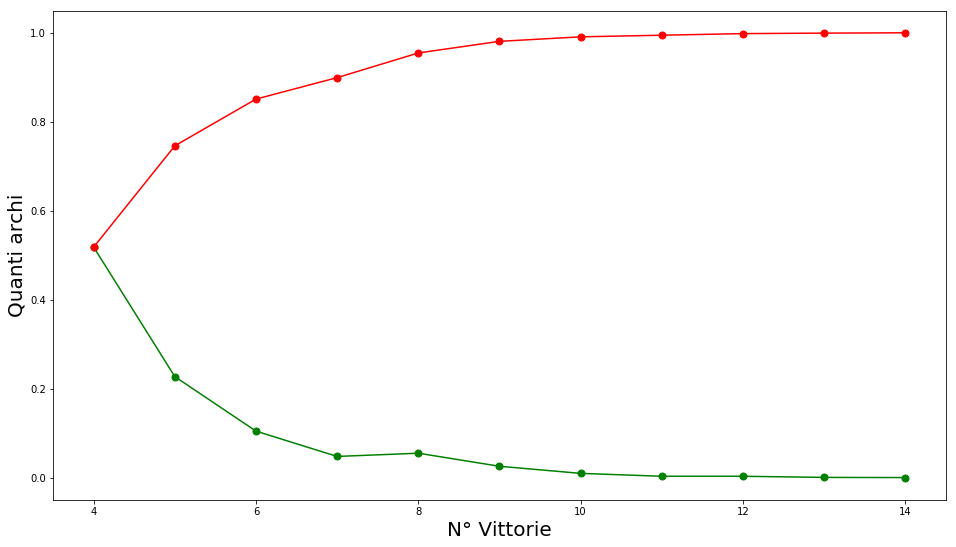

In [23]:
arr = [coopokemon[i[0]][i[1]]['won'] for i in coopokemon.edges()]
counts, x = np.histogram(arr, bins=np.arange(min(arr), max(arr)+1))
y = counts / len(arr)

assi = plt.figure(figsize=(16,9)).gca()
assi.plot(x[:-1], y, color='green',marker='o', linestyle='-', ms=7)
assi.plot(x[:-1], np.cumsum(y), color='red',marker='o', linestyle='-', ms=7)
assi.set_xlabel('N° Vittorie',size=20)
assi.set_ylabel('Quanti archi',size=20)

Text(0, 0.5, 'Quanti archi')

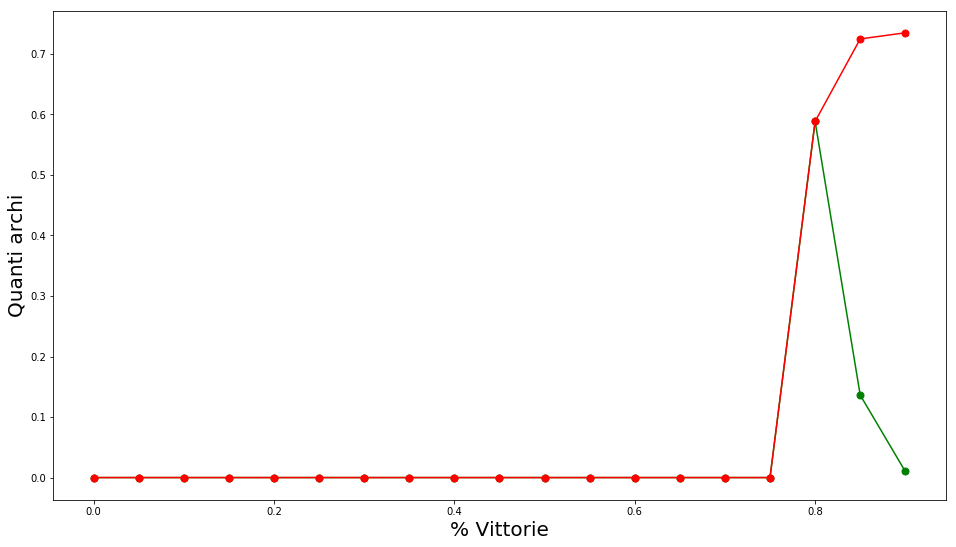

In [24]:
arr = [e[2]['won']/e[2]['count'] for e in coopokemon.edges(data=True)]
counts, x = np.histogram(arr, bins=np.arange(0,1,0.05))
y = counts / len(arr)

assi = plt.figure(figsize=(16,9)).gca()
assi.plot(x[:-1], y, color='green',marker='o', linestyle='-', ms=7)
assi.plot(x[:-1], np.cumsum(y), color='red',marker='o', linestyle='-', ms=7)
assi.set_xlabel('% Vittorie',size=20)
assi.set_ylabel('Quanti archi',size=20)

## I più deboli sono difesi dai più forti

In [25]:
std = nx.degree_assortativity_coefficient(coopokemon, weight=eff_weight)
prs = nx.degree_pearson_correlation_coefficient(coopokemon, weight=eff_weight)
std, abs(std-prs)

(-0.06717122102042178, 1.0130785099704553e-15)

#### Grado medio dei vicini

In [26]:
neig = nx.average_neighbor_degree(coopokemon, weight=eff_weight)
classif = sorted(neig.items(), reverse=True,key=lambda val: val[1])
classif[:6],'..','..', classif[-6:]

([('Wailord', 28.333333333333332),
  ('Delcatty', 26.0),
  ('Dewgong', 25.6),
  ('Octillery', 23.90909090909091),
  ('Exeggutor', 23.833333333333332),
  ('Trevenant', 23.714285714285715)],
 '..',
 '..',
 [('Solgaleo', 10.588235294117647),
  ('Tangrowth', 10.5),
  ('Dustox', 10.4),
  ('Zebstrika', 9.0),
  ('Unown', 8.0),
  ('Magcargo', 8.0)])

Text(0, 0.5, 'Node degree')

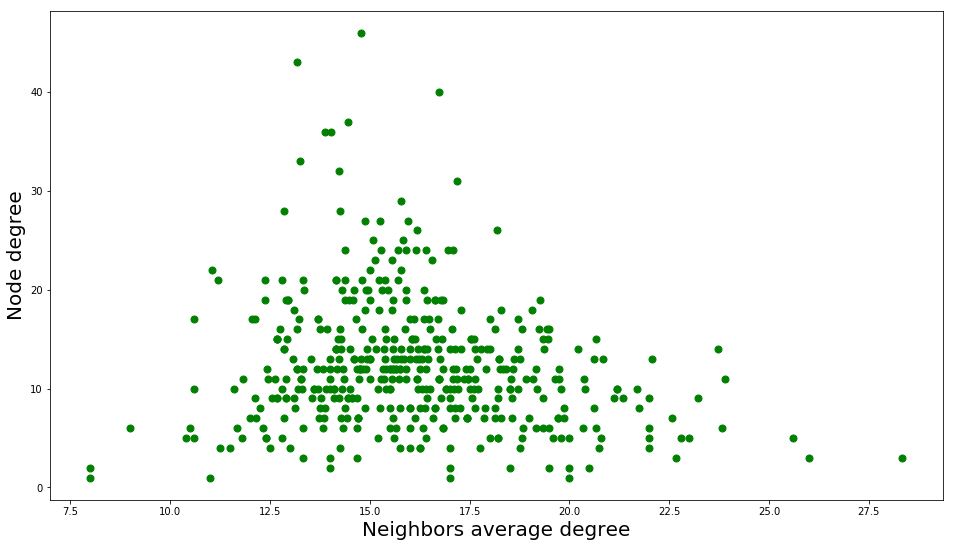

In [51]:
x,y = [],[]
for i in gradi:
    x.append(gradi[i])
    y.append(neig[i])

assi = plt.figure(figsize=(16,9)).gca()
assi.plot(y, x, color='green',marker='o', linestyle=' ', ms=7)
assi.set_xlabel('Neighbors average degree',size=20)
assi.set_ylabel('Node degree',size=20)

#### Connettività media per grado:

In [28]:
connec = nx.average_degree_connectivity(coopokemon, weight=eff_weight)
classif = sorted(connec.items(), reverse=True,key=lambda val: val[1])
classif[:10],'..','..', classif[-10:]

([(3, 19.833333333333332),
  (5, 17.35238095238095),
  (31, 17.193548387096776),
  (26, 17.192307692307693),
  (2, 16.785714285714285),
  (40, 16.725),
  (7, 16.494505494505493),
  (14, 16.43349753694581),
  (8, 16.411458333333332),
  (6, 16.386363636363637)],
 '..',
 '..',
 [(46, 14.782608695652174),
  (37, 14.45945945945946),
  (32, 14.21875),
  (1, 14.0),
  (36, 13.958333333333334),
  (21, 13.956709956709958),
  (22, 13.93939393939394),
  (28, 13.553571428571429),
  (33, 13.242424242424242),
  (43, 13.186046511627907)])

Liste degli attributi dei Pokémon

## Pokémon simili NON si collegano

In [29]:
type_list = ['Normal','Fighting','Flying','Poison','Ground','Rock','Bug','Ghost','Steel',
             'Fire','Water','Grass','Electric','Psychic','Ice','Dragon','Dark','Fairy']
stat_list = ["HP","Attack","Defense","Sp. Attack","Sp. Defense","Speed"]

#### Assortatività per pokemon

In [30]:
#normailzzata per nulla: è l'elenco dei pokemon più numerosi
assort_type = {k:nx.attribute_assortativity_coefficient(coopokemon,k) for k in type_list}
hee = sorted(assort_type.items(),key=lambda val:val[1])
for e in hee:
    t,n='',7
    if e[1]>0: t,n='+',6
    print(e[0],'    \t',t+str(e[1])[:n])

Normal     	 -0.0586
Ghost     	 -0.0363
Grass     	 -0.0315
Fire     	 -0.0308
Fairy     	 -0.0260
Electric     	 -0.0239
Psychic     	 -0.0199
Dragon     	 -0.0173
Ground     	 -0.0145
Steel     	 -0.0059
Water     	 -0.0035
Rock     	 -0.0032
Ice     	 -0.0021
Bug     	 +0.0018
Fighting     	 +0.0047
Poison     	 +0.0063
Dark     	 +0.0134
Flying     	 +0.0194


In [31]:
assort_type = {k:nx.numeric_assortativity_coefficient(coopokemon,k) for k in stat_list}
hee = sorted(assort_type.items(),key=lambda val:val[1])
for e in hee:
    t,n='',7
    if e[1]>0: t,n='+',6
    print(' '*(11-len(e[0]))+e[0],'\t',t+str(e[1])[:n])

 Sp. Attack 	 -0.0528
     Attack 	 -0.0476
      Speed 	 -0.0407
    Defense 	 -0.0281
         HP 	 -0.0276
Sp. Defense 	 +0.0208


#### Snippet Ego Network

In [32]:
#ego_with = nx.ego_graph(coopokemon,'Xerneas',radius=1,center=False)
#deg_ass = nx.degree_assortativity_coefficient(ego_with)
#typ_ass = {k:nx.attribute_assortativity_coefficient(ego_with,k) for k in type_list}
#sorted(typ_ass.items(),key=lambda val:val[1]), deg_ass

In [33]:
#ego_with = nx.ego_graph(coopokemon,'Xerneas',radius=1,center=False)
#deg_ass = nx.degree_assortativity_coefficient(ego_with)
#assort_type = {k:nx.numeric_assortativity_coefficient(ego_with,k) for k in stat_list}
#sorted(assort_type.items(),key=lambda val:val[1])

#### Omofilia media (Jaccard) nei sottogruppi di tipi

In [34]:
jl = []
for typ in type_list:
    all_tpk = [e[0] for e in coopokemon.nodes(data=True) if e[1][typ]]
    comboes = [(all_tpk[a],all_tpk[b]) for a in range(len(all_tpk)-1) for b in range(a+1, len(all_tpk))]
    jaccards_type = [i[2] for i in nx.jaccard_coefficient(coopokemon, comboes)]
    jl.append((typ,np.mean([i for i in jaccards_type if i])))
jl.sort(key=lambda val: val[1], reverse=True)
jl

[('Normal', 0.056025566925937895),
 ('Grass', 0.055973771383242096),
 ('Bug', 0.054953506181841395),
 ('Ice', 0.05077232260031992),
 ('Water', 0.05063569276812202),
 ('Flying', 0.049703443792439225),
 ('Ghost', 0.04964375888472695),
 ('Dark', 0.04932462532261814),
 ('Fairy', 0.04917303148589406),
 ('Psychic', 0.047723889936575614),
 ('Electric', 0.04723778932846348),
 ('Poison', 0.047112487261848766),
 ('Fire', 0.04630120402693121),
 ('Rock', 0.04599656796840764),
 ('Fighting', 0.04597533387410144),
 ('Dragon', 0.045678696631531714),
 ('Steel', 0.044903045384193284),
 ('Ground', 0.043444765439945215)]

#### Elenco omofilie assolute:

In [35]:
all_pk = list(coopokemon.nodes())
comboes = [(all_pk[a],all_pk[b]) for a in range(len(all_pk)-1) for b in range(a+1, len(all_pk))]
jaccards = [i for i in nx.jaccard_coefficient(coopokemon, comboes)]
jaccards.sort(key=lambda val: val[2], reverse=True)
jaccards[:8],'...','...',[i for i in jaccards if i[2]][-8:]

([('Wailord', 'Lumineon', 0.4),
  ('Wigglytuff', 'Magmortar', 0.2727272727272727),
  ('Stunfisk', 'Trevenant', 0.2727272727272727),
  ('Butterfree', 'Sandslash', 0.25),
  ('Parasect', 'Crabominable', 0.25),
  ('Rampardos', 'Vespiquen', 0.25),
  ('Mothim', 'Darkrai', 0.25),
  ('Lickilicky', 'Throh', 0.25)],
 '...',
 '...',
 [('Kyurem', 'Xerneas', 0.014492753623188406),
  ('Xerneas', 'Passimian', 0.014492753623188406),
  ('Jolteon', 'Xerneas', 0.014285714285714285),
  ('Rhyperior', 'Xerneas', 0.014084507042253521),
  ('Xerneas', 'Xurkitree', 0.014084507042253521),
  ('Yveltal', 'Zeraora', 0.014084507042253521),
  ('Xerneas', 'Lunala', 0.013888888888888888),
  ('Mewtwo', 'Xerneas', 0.01282051282051282)])

Percentuale coppie scollegate:

In [36]:
len([i for i in jaccards if not i[2]])/len(jaccards)

0.6810023976484987

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, '% Linked Couples')

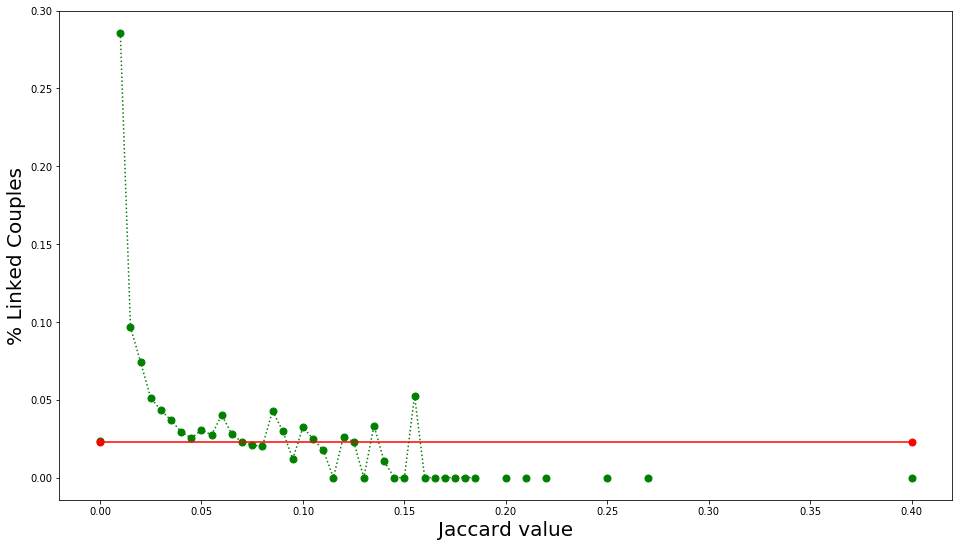

In [37]:
with_link=[]
no_link=[]
for e in jaccards:
    try:
        coopokemon[e[0]][e[1]]
    except:
        no_link.append(e[2])
    else:
        with_link.append(e[2])

zero = min([i[2] for i in jaccards])
infi = max([i[2] for i in jaccards])
step = 0.005
        
yw, x = np.histogram(with_link, bins=np.arange(zero,infi+step*2,step))
yn, _ = np.histogram(no_link, bins=np.arange(zero,infi+step*2,step))

assi = plt.figure(figsize=(16,9)).gca()
assi.plot(x[:-1], yw/(yw+yn), color='green',marker='o', linestyle=':', ms=7)
assi.plot([zero, infi], [0.0226]*2, color='red',marker='o', linestyle='-', ms=7)
assi.set_xlabel('Jaccard value',size=20)
assi.set_ylabel('% Linked Couples',size=20)

## I migliori team Pokémon (più o meno)

### Componenti connesse con CFinder

In [38]:
G = nx.Graph()
x = [i for i in nx.find_cliques(coopokemon) if len(i)==3]#>2]
for i in range(len(x)-1):
    for j in range(i,len(x)):
        tmp = set(x[i])
        tmp.update(set(x[j]))
        if len(tmp) == 4:
            G.add_edge(i,j)

overlapp_comp = []
for k in nx.connected_components(G):
    comp = set()
    for l in k:
        comp.update(x[l])
    overlapp_comp.append(comp)

#### Distribuzione delle dimensioni delle componenti

Text(0, 0.5, 'How many Over. Comm. ')

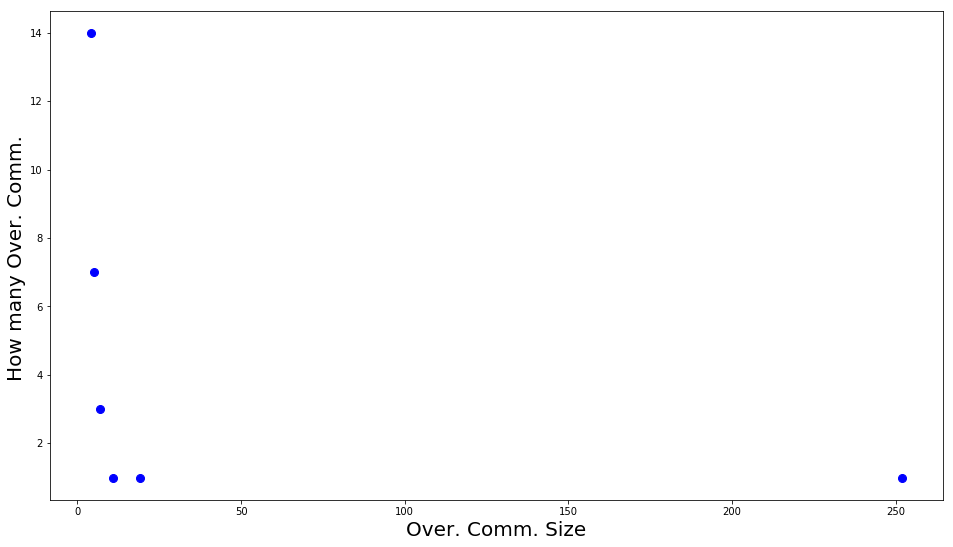

In [39]:
arr = [len(i) for i in overlapp_comp]
x = list(set(arr))
x.sort()
y, z = np.histogram(arr, bins=x+[x[-1]+1])

assi = plt.figure(figsize=(16,9)).gca()
assi.plot(x, y, color='blue',marker='o', linestyle=' ', ms=8)
assi.set_xlabel('Over. Comm. Size',size=20)
assi.set_ylabel('How many Over. Comm. ',size=20)

### % Pokémon nelle community e N° di OC-Bridge

In [40]:
clique_pk = [j for i in overlapp_comp for j in i]
up, sp = len(set(clique_pk)), len(clique_pk)
str(int(100*up/coopokemon.order()))+'%', len(clique_pk)-len(set(clique_pk))

('68%', 86)

### OC-Bridges e Grado

In [41]:
already_seen, oc_bridges = set(), set()
for i in clique_pk:
    if i in already_seen:
        oc_bridges.add(i)
    already_seen.add(i)
    
devop = {i:gradi[i] for i in oc_bridges}
classif = sorted(devop.items(), reverse=True,key=lambda val: val[1])
classif[:6],'..','..', classif[-6:]

([('Kommo-o', 43),
  ('Yveltal', 40),
  ('Scyther', 37),
  ('Zeraora', 32),
  ('Kartana', 31),
  ('Lucario', 29)],
 '..',
 '..',
 [('Clefable', 10),
  ('Porygon-Z', 10),
  ('Simipour', 10),
  ('Gourgeist', 8),
  ('Sudowoodo', 8),
  ('Latios', 8)])

### Team perfetti

In [43]:
[i for i in overlapp_comp if len(i) in range(4,10)]

[{'Darmanitan', 'Electivire', 'Latios', 'Linoone', 'Magnezone'},
 {'Gorebyss', 'Mimikyu', 'Palossand', 'Raichu'},
 {'Dhelmise', 'Exploud', 'Quagsire', 'Raikou'},
 {'Galvantula', 'Girafarig', 'Manectric', 'Mienshao'},
 {'Blissey', 'Galvantula', 'Simipour', 'Torterra'},
 {'Gyarados', 'Liepard', 'Toucannon', 'Uxie'},
 {'Arceus',
  'Beartic',
  'Gogoat',
  'Palossand',
  'Porygon-Z',
  'Scizor',
  'Type: Null'},
 {'Amoonguss',
  'Dodrio',
  'Exeggutor',
  'Necrozma',
  'Nidoking',
  'Yveltal',
  'Zygarde'},
 {'Aurorus', 'Jolteon', 'Pyukumuku', 'Talonflame'},
 {'Celesteela', 'Minior', 'Sudowoodo', 'Zeraora'},
 {'Camerupt', 'Lugia', 'Miltank', 'Scyther'},
 {'Porygon-Z', 'Registeel', 'Samurott', 'Silvally'},
 {'Bellossom', 'Hoopa', 'Infernape', 'Quagsire'},
 {'Groudon', 'Pidgeot', 'Shaymin', 'Tauros'},
 {'Chansey', 'Comfey', 'Froslass', 'Shaymin'},
 {'Clefable', 'Haxorus', 'Milotic', 'Probopass', 'Scyther'},
 {'Azumarill',
  'Espeon',
  'Gorebyss',
  'Heatran',
  'Kartana',
  'Lucario',
  'Lu